![title](../static/wcar.png)
#  Pull Down / Fractionation Analysis

    Wellcome Centre for Anti-Infectives Research
    School of Life Sciences, University of Dundee

In [1]:
import pathlib
pathlib.Path().absolute()

PosixPath('/Users/mtinti/Desktop/git_projects/lucia_LG1_LG2/notebooks')

In [2]:
#reload library if modified
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.insert(0, '../mylib')

In [4]:
import os
from ProteomicsUtility import utilities as PTUT
import pandas as pd
import seaborn as sns
import ProtRank
import matplotlib.pyplot as plt
import numpy as np

## Load and clean dataset

### add High Confidende Glycosome proteome

In [5]:
hc_glycosome = open('../HC_gly.txt').read().split('\n')
len(hc_glycosome)

159

In [6]:
hc_glycosome = [n+':' for n in hc_glycosome]
hc_glycosome[0:5]

['Tb927.1.3220:',
 'Tb927.1.3830:',
 'Tb927.1.4490:',
 'Tb927.1.5000:',
 'Tb927.1.720:']

In [7]:
df = pd.read_csv('../txt/proteinGroups.txt',sep='\t')
filter_gly = []
for n in df['Protein IDs']:
    found = False
    for g in hc_glycosome:
        if g in n:
            found = True
    filter_gly.append(found)

df['HC_gly']=filter_gly
sum(filter_gly)

34

### add gene symbol from TriTrypDB

In [8]:
gene_table = pd.read_csv('../txt/GenesByTaxon_Summary.txt',sep='\t')
symbol_dict = dict(zip(gene_table['Gene ID'],gene_table['Gene Name or Symbol']))
symbol_dict['Tb927.8.520']

nan

### load and clean

In [9]:
df = PTUT.clean_df(df, score=5, unique_pep_threshold=2)
df = PTUT.mod_df(df)
print(df.shape)
df = df[df['HC_gly']]
df.head()

starting from: (202, 83)
removed  6 Protein Groups by: Only identified by site
tot  6  entries removed
---------------
removed  1 Protein Groups by: Reverse
tot  7  entries removed
---------------
removed  19 Protein Groups by: Potential contaminant
tot  26  entries removed
---------------
Score
nothing removed
---------------
removed  52 Protein Groups by: Peptide counts (unique)
tot  78  entries removed
---------------
(124, 86)


,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions,HC_gly,unique_int,Gene_id,desc
35,Tb927.10.5620:mRNA-p1;Tb11.v5.0531.1-p1,Tb927.10.5620:mRNA-p1;Tb11.v5.0531.1-p1,22;22,22;22,22;22,Tb927.10.5620:mRNA-p1 | transcript=Tb927.10.56...,2,22,22,22,...,20;55;82;237;268;298;299;322;323;373;454;537;5...,29;30;81;82;123;124;125;126;127;362;363;364;36...,43;44;45;46;47;123;124;125;126;127;128;129;184...,45;123;184;596;690;791;847;851;1012;1205;1454;...,35;36;37,134;151;344,True,22,Tb927.10.5620,"fructose-bisphosphate aldolase, glycosomal"
42,Tb927.11.11330:mRNA-p1;Tb11.v5.1035.1-p1;Tb927...,Tb927.11.11330:mRNA-p1;Tb11.v5.1035.1-p1,5;5;2;2;1,5;5;2;2;1,5;5;2;2;1,Tb927.11.11330:mRNA-p1 | transcript=Tb927.11.1...,5,5,5,5,...,97;100;130;671;674,163;166;210;1118;1124,272;275;354;1825;1834,272;275;354;1825;1834,NaN,NaN,True,5,Tb927.11.11330,heat shock protein 70
50,Tb927.1.3830:mRNA-p1,Tb927.1.3830:mRNA-p1,2,2,2,Tb927.1.3830:mRNA-p1 | transcript=Tb927.1.3830...,1,2,2,2,...,558;559;786,940;941;1291,1537;1538;2082,1538;2082,49,410,True,2,Tb927.1.3830,"glucose-6-phosphate isomerase, glycosomal"
51,Tb927.1.720:mRNA-p1;Tb927.1.710:mRNA-p1;Tb927....,Tb927.1.720:mRNA-p1;Tb927.1.710:mRNA-p1;Tb927....,4;2;2,4;2;2,4;2;2,Tb927.1.720:mRNA-p1 | transcript=Tb927.1.720:m...,3,4,4,4,...,159;287;453;821,250;454;713;1343;1344,403;762;1198;2194,403;762;1198;2194,NaN,NaN,True,4,Tb927.1.720,phosphoglycerate kinase
62,Tb927.10.1390:mRNA-p1,Tb927.10.1390:mRNA-p1,9,9,9,Tb927.10.1390:mRNA-p1 | transcript=Tb927.10.13...,1,9,9,9,...,126;216;217;278;357;358;390;391;801;925;1000;1043,205;329;330;331;439;440;570;571;617;618;1312;1...,342;343;344;535;536;537;722;723;972;973;974;10...,343;536;723;973;1041;2121;2532;2698;2797,59;60,96;146,True,9,Tb927.10.1390,Hypoxanthine-guanine-xanthine phosphoribosyltr...


In [10]:
df['Gene Name or Symbol'] = [symbol_dict.get(n) for n in df['Gene_id']]

In [11]:
df[df['HC_gly']].shape

(26, 87)

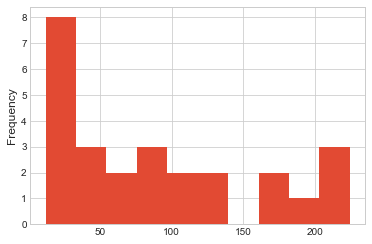

In [12]:
df['Score'].plot(kind='hist')

## Extract Ibaq Values
Let's have a look at the intensity values

In [13]:
#color palette
palette=['b','r']
palette_g = ['r','b']
color_dictionary = { 'b':'LG1','r':'LG2'}

In [14]:
#list(df.columns)iBAQ LG1

In [15]:
#tag ='Intensity'
tag ='iBAQ'
#tag ='LFQ intensity'
cols=[' LG1',' LG2']
cols = [tag+n for n in cols]
selection = df[cols]
selection.columns = [n.split(' ')[-1] for n in cols]
print(selection.shape)
selection = selection[(selection.T != 0).any()]
print(selection.shape)

#selection.rename({'PULL':'POOL'},axis=1,inplace=True)
#selection.describe()

(26, 2)
(26, 2)


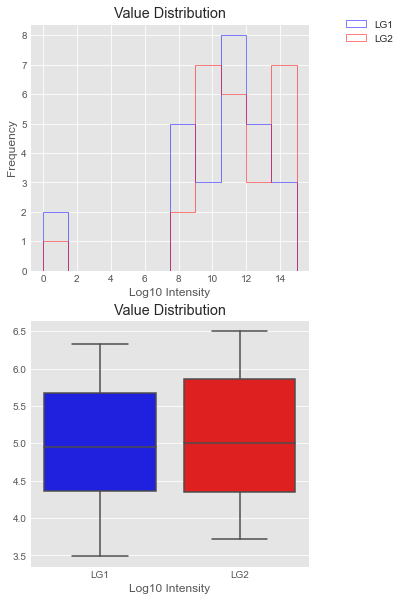

In [16]:
plt.style.use('ggplot')
fig,axes=plt.subplots(ncols=1,nrows=2,figsize=(5,10))

np.log1p(selection).plot(kind='hist', color=palette, histtype='step',ax=axes[0])
axes[0].legend(loc='center left', bbox_to_anchor=(0.7, 0.5))
axes[0].set_title('Value Distribution')
axes[0].set_xlabel('Log10 Intensity')
axes[0].legend(bbox_to_anchor=(1.1, 1.05))
sns.boxplot(data =np.log10(selection.replace(0,np.nan)),
            showfliers=False,palette=palette,ax=axes[1])
plt.title('Value Distribution')
plt.xlabel('Log10 Intensity')
plt.savefig(os.path.join('../value_distribution.png'))
plt.show()

## Missing Data Analysis

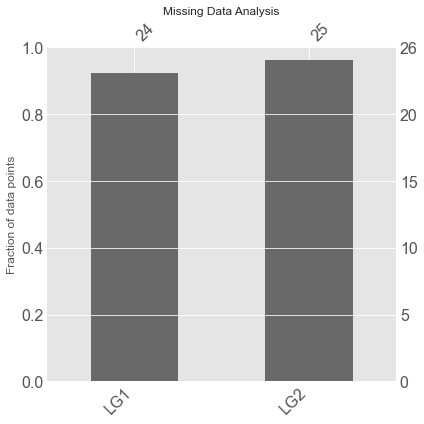

In [17]:
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
#visualization of missing data
ax=msno.bar(selection.replace(0,np.nan),figsize=(6, 6))
plt.title('Missing Data Analysis',size=12)
ax.set_ylabel('Fraction of data points',size=12)
plt.tight_layout()
plt.savefig('missing.png')
plt.show()

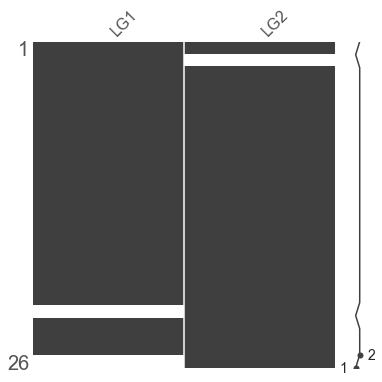

In [18]:
#print(data.shape)
msno.matrix(selection.replace(0,np.nan), figsize=(6, 6))
plt.show()

In [19]:
selection.head()

,LG1,LG2
35,2115900.0,3157000.0
42,13510.0,0.0
50,3109.5,5612.3
51,4282.1,10640.0
62,48473.0,166190.0


In [20]:
lg1_nan = selection[['LG1']].replace(0,np.nan).isna().sum(axis=1)
lg2_nan  = selection[['LG2']].replace(0,np.nan).isna().sum(axis=1)
only_lg_1 = selection[(lg2_nan==1) & (lg1_nan==0)]
only_lg_2 = selection[(lg2_nan==0) & (lg1_nan==1)]
print(' Found only in LG1:',only_lg_1.shape[0],'\n',
      'Found only in LG2:',only_lg_2.shape[0])

 Found only in LG1: 1 
 Found only in LG2: 2


In [21]:
df.head()

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions,HC_gly,unique_int,Gene_id,desc,Gene Name or Symbol
35,Tb927.10.5620:mRNA-p1;Tb11.v5.0531.1-p1,Tb927.10.5620:mRNA-p1;Tb11.v5.0531.1-p1,22;22,22;22,22;22,Tb927.10.5620:mRNA-p1 | transcript=Tb927.10.56...,2,22,22,22,...,29;30;81;82;123;124;125;126;127;362;363;364;36...,43;44;45;46;47;123;124;125;126;127;128;129;184...,45;123;184;596;690;791;847;851;1012;1205;1454;...,35;36;37,134;151;344,True,22,Tb927.10.5620,"fructose-bisphosphate aldolase, glycosomal",ALD
42,Tb927.11.11330:mRNA-p1;Tb11.v5.1035.1-p1;Tb927...,Tb927.11.11330:mRNA-p1;Tb11.v5.1035.1-p1,5;5;2;2;1,5;5;2;2;1,5;5;2;2;1,Tb927.11.11330:mRNA-p1 | transcript=Tb927.11.1...,5,5,5,5,...,163;166;210;1118;1124,272;275;354;1825;1834,272;275;354;1825;1834,NaN,NaN,True,5,Tb927.11.11330,heat shock protein 70,HSP70
50,Tb927.1.3830:mRNA-p1,Tb927.1.3830:mRNA-p1,2,2,2,Tb927.1.3830:mRNA-p1 | transcript=Tb927.1.3830...,1,2,2,2,...,940;941;1291,1537;1538;2082,1538;2082,49,410,True,2,Tb927.1.3830,"glucose-6-phosphate isomerase, glycosomal",PGI
51,Tb927.1.720:mRNA-p1;Tb927.1.710:mRNA-p1;Tb927....,Tb927.1.720:mRNA-p1;Tb927.1.710:mRNA-p1;Tb927....,4;2;2,4;2;2,4;2;2,Tb927.1.720:mRNA-p1 | transcript=Tb927.1.720:m...,3,4,4,4,...,250;454;713;1343;1344,403;762;1198;2194,403;762;1198;2194,NaN,NaN,True,4,Tb927.1.720,phosphoglycerate kinase,PGKA
62,Tb927.10.1390:mRNA-p1,Tb927.10.1390:mRNA-p1,9,9,9,Tb927.10.1390:mRNA-p1 | transcript=Tb927.10.13...,1,9,9,9,...,205;329;330;331;439;440;570;571;617;618;1312;1...,342;343;344;535;536;537;722;723;972;973;974;10...,343;536;723;973;1041;2121;2532;2698;2797,59;60,96;146,True,9,Tb927.10.1390,Hypoxanthine-guanine-xanthine phosphoribosyltr...,HGXPRT


In [22]:
np.log1p(only_lg_1).join(df[['Protein IDs','desc','HC_gly']])

,LG1,LG2,Protein IDs,desc,HC_gly
42,9.511259,0.0,Tb927.11.11330:mRNA-p1;Tb11.v5.1035.1-p1;Tb927...,heat shock protein 70,True


In [23]:
np.log1p(only_lg_2).join(df[['Protein IDs','desc','Gene Name or Symbol']])

,LG1,LG2,Protein IDs,desc,Gene Name or Symbol
168,0.0,10.020604,Tb927.7.5680:mRNA-p1,"deoxyribose-phosphate aldolase, putative",NaN
200,0.0,9.918622,Tb927.9.9000:mRNA-p1,isopentenyl-diphosphate delta-isomerase (type II),idi1


## Figure  paper

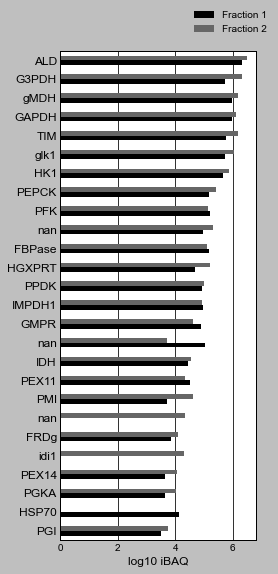

In [24]:
plt.style.use('grayscale')
font_dict = {'fontname':'Arial','fontsize':12}

temp = df[['Protein IDs','desc','Gene Name or Symbol']+cols]
temp.columns = ['Protein IDs','desc', 'Gene Name or Symbol','Fraction 1', 'Fraction 2']
temp['sum_ibaq']=temp[['Fraction 1', 'Fraction 2']].sum(axis=1)
temp = temp.sort_values('sum_ibaq',ascending=True)
temp[['Fraction 1', 'Fraction 2']]=np.log1p(temp[['Fraction 1', 'Fraction 2']])/2.303
del temp['sum_ibaq']
temp.plot(kind='barh', figsize=(4,8))
locs, labels = plt.yticks()
#plt.yticks(locs, [n.split(',')[0] if '1,6' not in n else n
#                  for n in list(temp['desc'])], **font_dict)
plt.yticks(locs, list(temp['Gene Name or Symbol']), **font_dict)

plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.xlabel('log10 ' +tag,**font_dict)


plt.tight_layout()
plt.grid(b=None,axis='y')
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'


plt.savefig('FigX.png')
plt.savefig('FigX.svg')

plt.show()

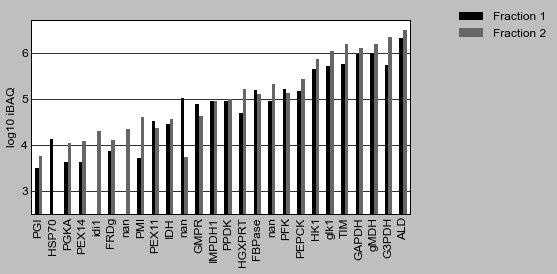

In [25]:
plt.style.use('grayscale')
font_dict = {'fontname':'Arial','fontsize':12}

temp = df[['Protein IDs','desc','Gene Name or Symbol']+cols]
temp.columns = ['Protein IDs','desc', 'Gene Name or Symbol','Fraction 1', 'Fraction 2']
temp['sum_ibaq']=temp[['Fraction 1', 'Fraction 2']].sum(axis=1)
temp = temp.sort_values('sum_ibaq',ascending=True)
temp[['Fraction 1', 'Fraction 2']]=np.log1p(temp[['Fraction 1', 'Fraction 2']])/2.303
del temp['sum_ibaq']
temp.plot(kind='bar', figsize=(8,4))
locs, labels = plt.xticks()
#plt.yticks(locs, [n.split(',')[0] if '1,6' not in n else n
#                  for n in list(temp['desc'])], **font_dict)
plt.xticks(locs, list(temp['Gene Name or Symbol']), **font_dict)

plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.ylabel('log10 ' +tag,**font_dict)


plt.tight_layout()
plt.grid(b=None,axis='x')
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'

plt.ylim(2.5,6.7)
plt.savefig('FigX2.png')
plt.savefig('FigX2.svg')

plt.show()

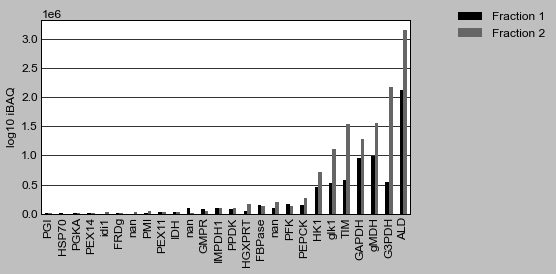

In [26]:
plt.style.use('grayscale')
font_dict = {'fontname':'Arial','fontsize':12}

temp = df[['Protein IDs','desc','Gene Name or Symbol']+cols]
temp.columns = ['Protein IDs','desc', 'Gene Name or Symbol','Fraction 1', 'Fraction 2']
temp['sum_ibaq']=temp[['Fraction 1', 'Fraction 2']].sum(axis=1)
temp = temp.sort_values('sum_ibaq',ascending=True)
#temp[['Fraction 1', 'Fraction 2']]=np.log1p(temp[['Fraction 1', 'Fraction 2']])/2.303
del temp['sum_ibaq']
temp.plot(kind='bar', figsize=(8,4))
locs, labels = plt.xticks()
#plt.yticks(locs, [n.split(',')[0] if '1,6' not in n else n
#                  for n in list(temp['desc'])], **font_dict)
plt.xticks(locs, list(temp['Gene Name or Symbol']), **font_dict)

plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.ylabel('log10 ' +tag, **font_dict)


plt.tight_layout()
plt.grid(b=None,axis='x')
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'


plt.savefig('FigX3.png')
plt.savefig('FigX3.svg')

plt.show()

### Split image in 3 panels
#### panel 1

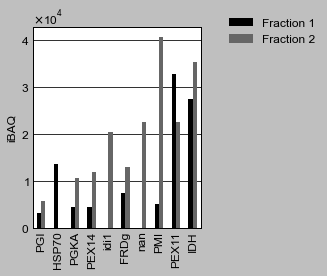

In [63]:
plt.style.use('grayscale')
font_dict = {'fontname':'Arial','fontsize':12}

temp = df[['Protein IDs','desc','Gene Name or Symbol']+cols]
temp.columns = ['Protein IDs','desc', 'Gene Name or Symbol','Fraction 1', 'Fraction 2']
temp['sum_ibaq']=temp[['Fraction 1', 'Fraction 2']].sum(axis=1)
temp = temp.sort_values('sum_ibaq',ascending=True)
temp = temp.iloc[:10,:]
#temp[['Fraction 1', 'Fraction 2']]=np.log1p(temp[['Fraction 1', 'Fraction 2']])/2.303
del temp['sum_ibaq']

fig,ax = plt.subplots(figsize=(5,4))

temp.plot(kind='bar', ax=ax)
ax.yaxis.set_major_formatter(formatter) 

locs, labels = plt.xticks()
#plt.yticks(locs, [n.split(',')[0] if '1,6' not in n else n
#                  for n in list(temp['desc'])], **font_dict)
plt.xticks(locs, list(temp['Gene Name or Symbol']), **font_dict)

plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.ylabel(tag,**font_dict)

plt.tight_layout()
plt.grid(b=None,axis='x')
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'

#plt.axes.ticklabel_format(axis='y', style='scientific')

plt.savefig('FigX3_a.png')
plt.savefig('FigX3_a.svg')

plt.show()

#### panel 2

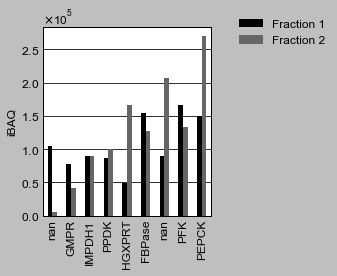

In [64]:
plt.style.use('grayscale')
font_dict = {'fontname':'Arial','fontsize':12}

temp = df[['Protein IDs','desc','Gene Name or Symbol']+cols]
temp.columns = ['Protein IDs','desc', 'Gene Name or Symbol','Fraction 1', 'Fraction 2']
temp['sum_ibaq']=temp[['Fraction 1', 'Fraction 2']].sum(axis=1)
temp = temp.sort_values('sum_ibaq',ascending=True)
temp = temp.iloc[10:19,:]
#temp[['Fraction 1', 'Fraction 2']]=np.log1p(temp[['Fraction 1', 'Fraction 2']])/2.303
del temp['sum_ibaq']

fig,ax = plt.subplots(figsize=(5,4))

temp.plot(kind='bar', ax=ax)
ax.yaxis.set_major_formatter(formatter) 

locs, labels = plt.xticks()
#plt.yticks(locs, [n.split(',')[0] if '1,6' not in n else n
#                  for n in list(temp['desc'])], **font_dict)
plt.xticks(locs, list(temp['Gene Name or Symbol']), **font_dict)

plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.ylabel(tag,**font_dict)

plt.tight_layout()
plt.grid(b=None,axis='x')
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'

#plt.axes.ticklabel_format(axis='y', style='scientific')

plt.savefig('FigX3_b.png')
plt.savefig('FigX3_b.svg')

plt.show()

#### panel 3

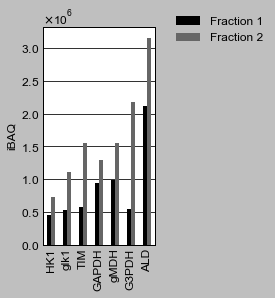

In [65]:
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 





plt.style.use('grayscale')
font_dict = {'fontname':'Arial','fontsize':12}

temp = df[['Protein IDs','desc','Gene Name or Symbol']+cols]
temp.columns = ['Protein IDs','desc', 'Gene Name or Symbol','Fraction 1', 'Fraction 2']
temp['sum_ibaq']=temp[['Fraction 1', 'Fraction 2']].sum(axis=1)
temp = temp.sort_values('sum_ibaq',ascending=True)
temp = temp.iloc[19:,:]
#temp[['Fraction 1', 'Fraction 2']]=np.log1p(temp[['Fraction 1', 'Fraction 2']])/2.303
del temp['sum_ibaq']

fig,ax = plt.subplots(figsize=(2,4))
temp.plot(kind='bar', ax=ax)
locs, labels = plt.xticks()
#plt.yticks(locs, [n.split(',')[0] if '1,6' not in n else n
#                  for n in list(temp['desc'])], **font_dict)
plt.xticks(locs, list(temp['Gene Name or Symbol']), **font_dict)

plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.ylabel(tag,**font_dict)

#plt.ticklabel_format(axis='y', style='scientific')
ax.yaxis.set_major_formatter(formatter) 

plt.tight_layout()
plt.grid(b=None,axis='x')
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'


plt.savefig('FigX3_c.png')
plt.savefig('FigX3_c.svg')

plt.show()

### Save data

In [66]:
temp.to_csv('table.csv')

In [67]:
!jupyter nbconvert --to html_toc analysis.ipynb

[NbConvertApp] Converting notebook analysis.ipynb to html_toc
[NbConvertApp] Support files will be in analysis_files/
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Writing 362927 bytes to analysis.html


In [ ]:
!git init